In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')

# Basic Data Exploration

In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<Axes: xlabel='charges', ylabel='Count'>

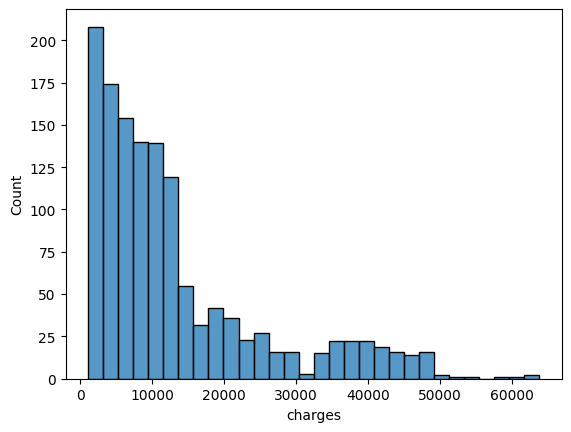

In [6]:
sns.histplot(data=df, x='charges')

# Log Transformation of charges

In [7]:
df['charges_log'] = np.log(df['charges'])

<Axes: xlabel='charges_log', ylabel='Count'>

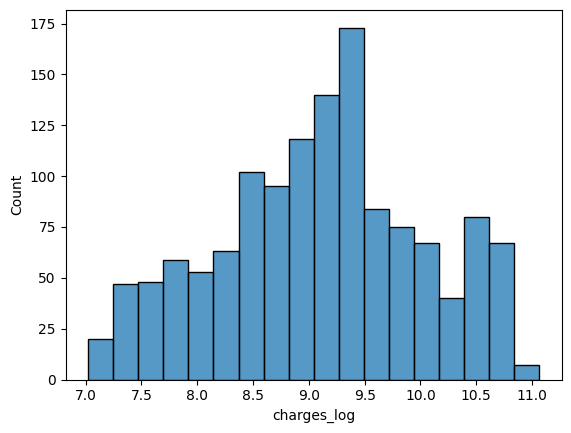

In [8]:
sns.histplot(data=df, x='charges_log')

<Axes: xlabel='bmi', ylabel='Count'>

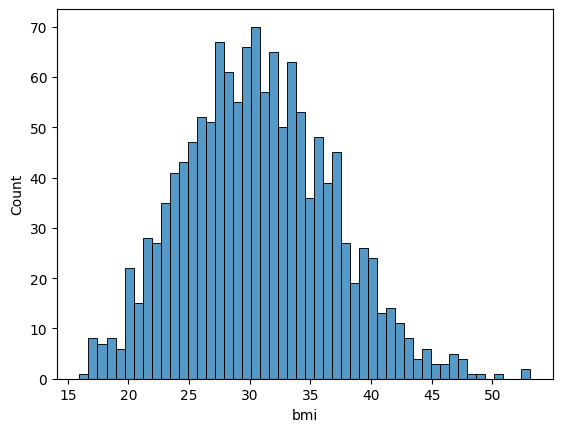

In [9]:
sns.histplot(data=df, x='bmi',bins=50)

<Axes: xlabel='sex', ylabel='charges'>

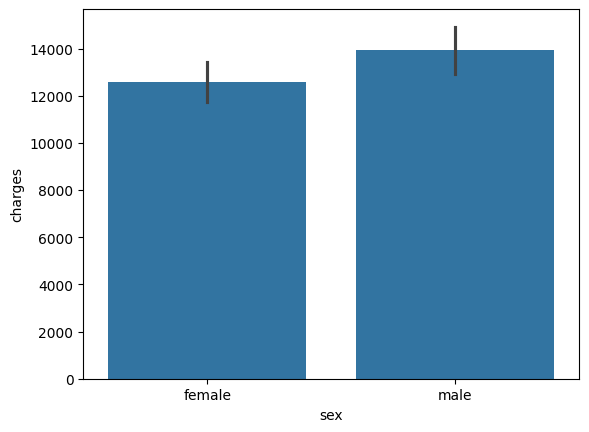

In [10]:
sns.barplot(x='sex', y='charges', data=df)

<Axes: xlabel='sex', ylabel='Count'>

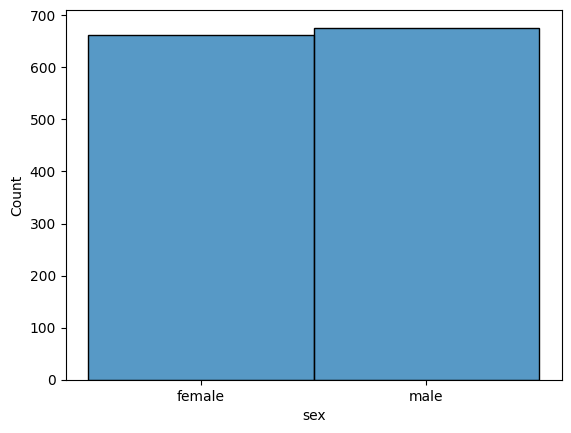

In [11]:
sns.histplot(x='sex', data=df)

<Axes: xlabel='sex', ylabel='charges'>

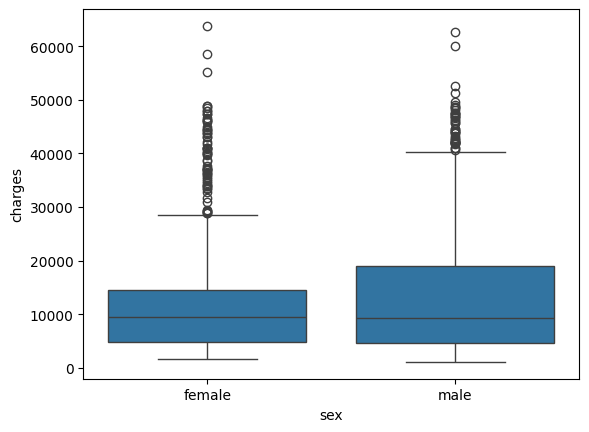

In [12]:
sns.boxplot(x='sex', y='charges', data=df)

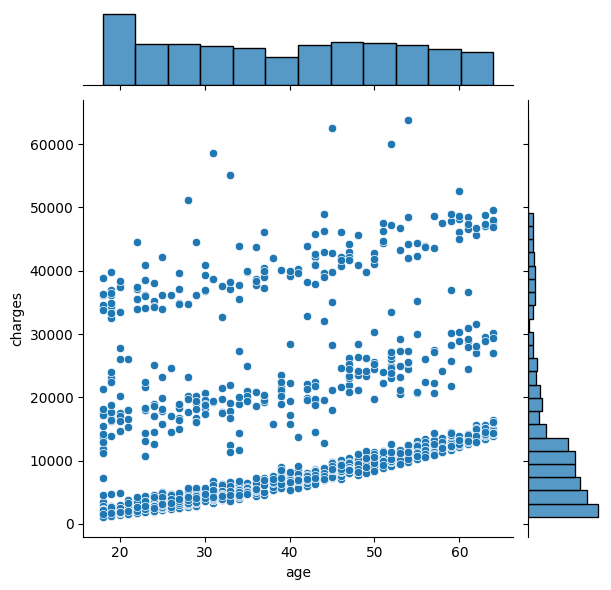

In [13]:
sns.jointplot(x='age', y='charges', data=df)

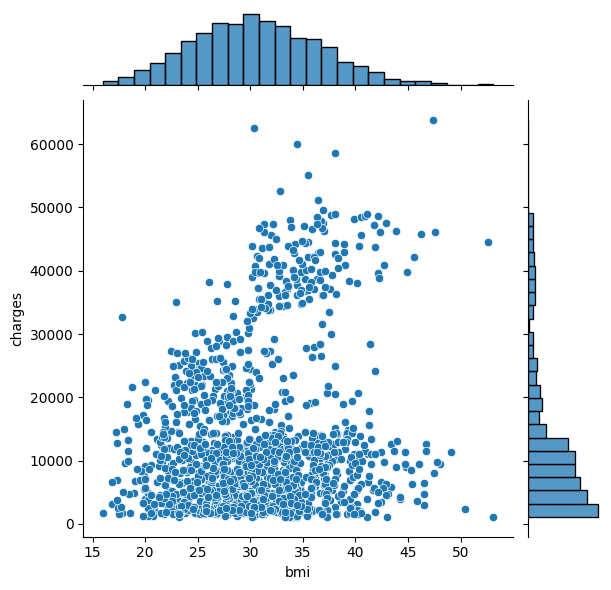

In [14]:
sns.jointplot(x='bmi', y='charges', data = df)

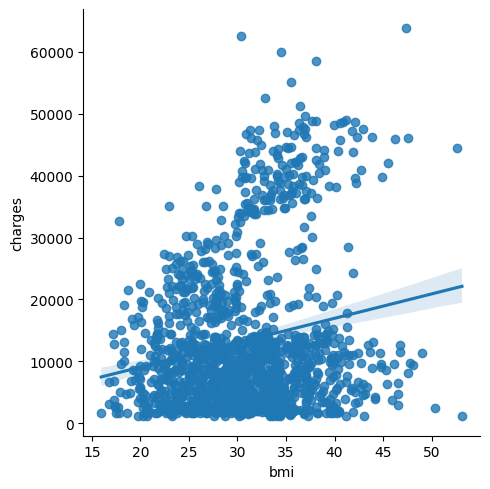

In [15]:
sns.lmplot(x='bmi', y='charges', data=df)

<Axes: xlabel='children', ylabel='charges'>

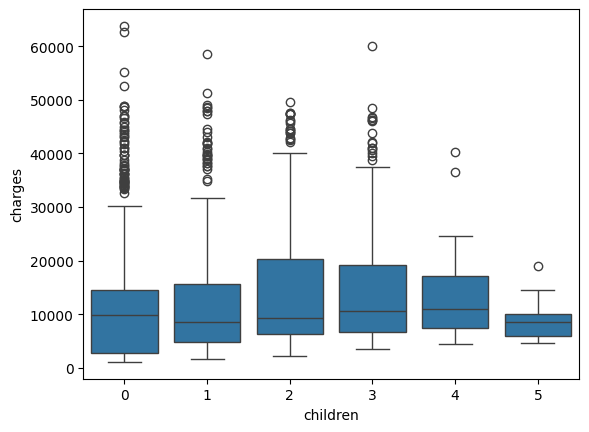

In [16]:
sns.boxplot(x='children', y='charges', data=df)

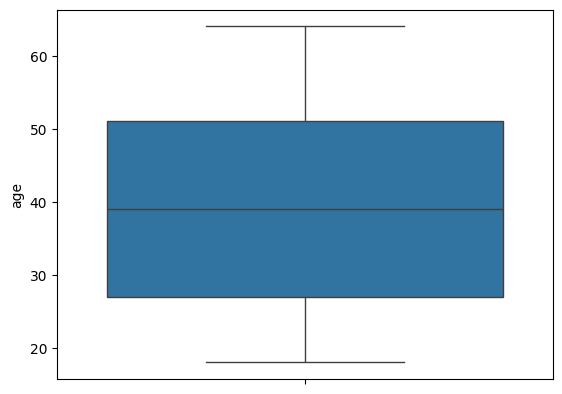

In [17]:
sns.boxplot(y='age', data=df)
plt.show()

<Axes: ylabel='bmi'>

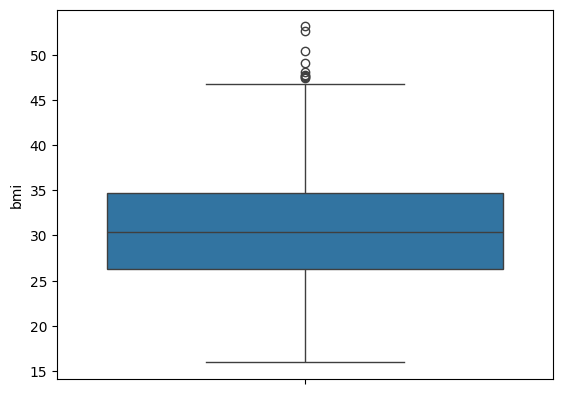

In [18]:
sns.boxplot(y='bmi', data=df)

## Data Capping for outliers

In [19]:
def cap_data(data, percentile=95):
    # Calculating upper and lower limit of data
    lower_bound = np.quantile(data, (100- percentile)/100)
    upper_bound = np.quantile(data, percentile/100)
    # capping data within those bounds
    capped_data = np.clip(data, lower_bound, upper_bound)

    return capped_data

In [20]:
cap_df = cap_data(df['bmi'])

In [21]:
print(cap_df)

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64


In [22]:
df['bmi'] = cap_df

<Axes: xlabel='bmi', ylabel='Count'>

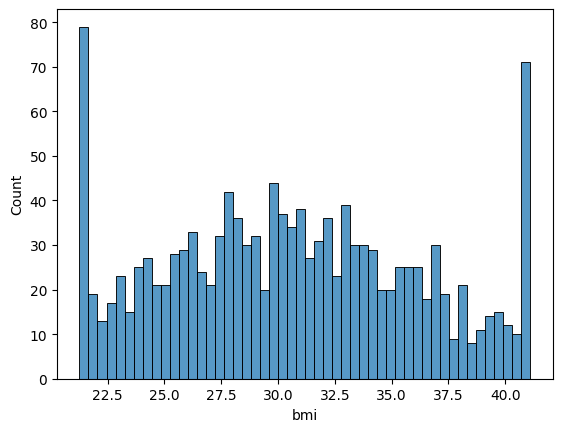

In [23]:
sns.histplot(data=df, x='bmi',bins=50)

<Axes: ylabel='bmi'>

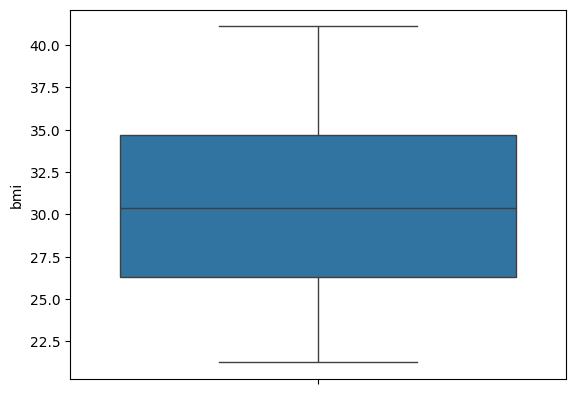

In [24]:
sns.boxplot(y='bmi', data=df)

<Axes: ylabel='charges'>

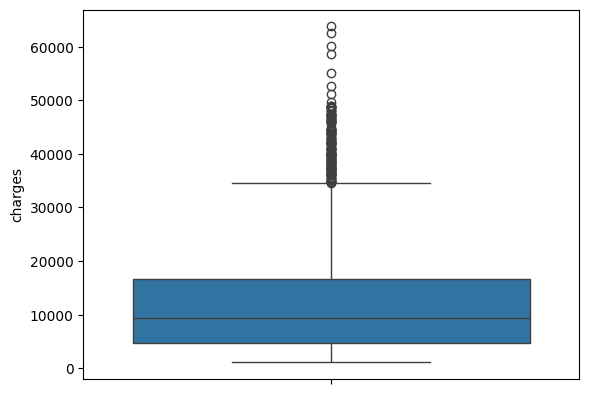

In [25]:
sns.boxplot(y='charges', data=df)

<Axes: ylabel='charges'>

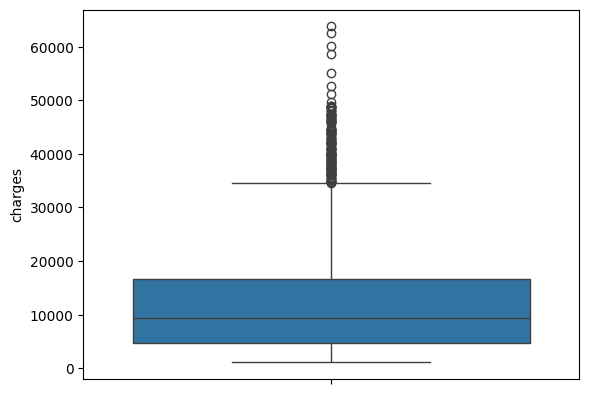

In [26]:
sns.boxplot(y='charges', data=df)

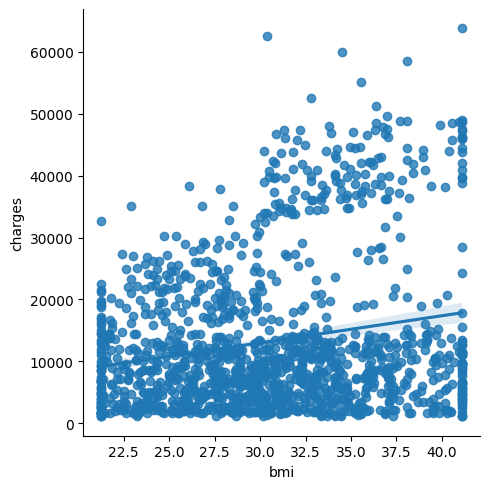

In [27]:
sns.lmplot(x='bmi', y='charges', data=df)

## Outliers elimination

In [28]:
# z_scores = (df['charges'] - df['charges'].mean()) / df['charges'].std()
# outliers = df[z_scores > 1.8]

In [29]:
# print(outliers.describe())

In [30]:
# df_cleaned = df[~df.index.isin(outliers.index)]


In [31]:
# df_cleaned.info()

In [32]:
# df_cleaned.describe()

In [33]:
# sns.boxplot(y='charges', data=df_cleaned)

In [34]:
# df = df_cleaned

In [35]:
cap_char3 = cap_data(df['charges'])

In [36]:
df['charges'] = cap_char3

<Axes: xlabel='charges', ylabel='Count'>

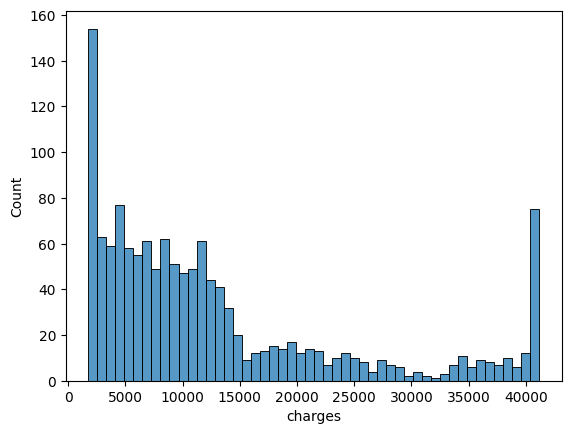

In [37]:
sns.histplot(x='charges', data=df,bins=50)

<Axes: ylabel='charges'>

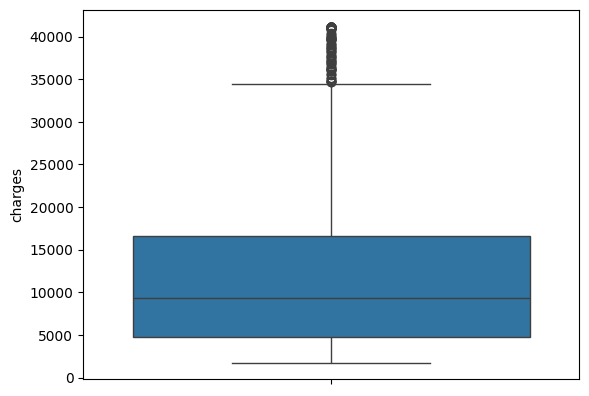

In [38]:
sns.boxplot(y='charges', data=df)

## Data binary encoding

In [39]:
df['gender_int'] = df['sex'].map({'male':1, 'female':0})

In [40]:
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_log,gender_int
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176,0
1,18,male,33.770,1,no,southeast,1757.75340,7.453302,1
2,28,male,33.000,3,no,southeast,4449.46200,8.400538,1
3,33,male,22.705,0,no,northwest,21984.47061,9.998092,1
4,32,male,28.880,0,no,northwest,3866.85520,8.260197,1


In [41]:
df['smoker_int'] = df['smoker'].map({'yes':1, 'no':0})

In [42]:
df.head()

,age,sex,bmi,children,smoker,region,charges,charges_log,gender_int,smoker_int
0,19,female,27.900,0,yes,southwest,16884.92400,9.734176,0,1
1,18,male,33.770,1,no,southeast,1757.75340,7.453302,1,0
2,28,male,33.000,3,no,southeast,4449.46200,8.400538,1,0
3,33,male,22.705,0,no,northwest,21984.47061,9.998092,1,0
4,32,male,28.880,0,no,northwest,3866.85520,8.260197,1,0


## Getting rid of unnecessary columns

In [43]:
df.pop('sex')

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [44]:
df.pop('smoker')

0       yes
1        no
2        no
3        no
4        no
       ... 
1333     no
1334     no
1335     no
1336     no
1337    yes
Name: smoker, Length: 1338, dtype: object

In [45]:
df.pop('region')

0       southwest
1       southeast
2       southeast
3       northwest
4       northwest
          ...    
1333    northwest
1334    northeast
1335    southeast
1336    southwest
1337    northwest
Name: region, Length: 1338, dtype: object

In [46]:
df.head()

,age,bmi,children,charges,charges_log,gender_int,smoker_int
0,19,27.900,0,16884.92400,9.734176,0,1
1,18,33.770,1,1757.75340,7.453302,1,0
2,28,33.000,3,4449.46200,8.400538,1,0
3,33,22.705,0,21984.47061,9.998092,1,0
4,32,28.880,0,3866.85520,8.260197,1,0


# Linear regression

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X = df.drop('charges', axis=1)
y = df['charges']

In [49]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state= 500)


In [50]:
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state= 42)


In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm = LinearRegression()

In [53]:
lm.fit(X_train, y_train)

LinearRegression()

In [54]:
print(lm.intercept_)

-80515.63378283844


In [55]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])

In [56]:
coeff_df

,Coefficient
age,-103.554442
bmi,195.160270
children,-492.453925
charges_log,9927.762479
gender_int,656.779063
smoker_int,7426.830157


In [57]:
predictions = lm.predict(X_val)

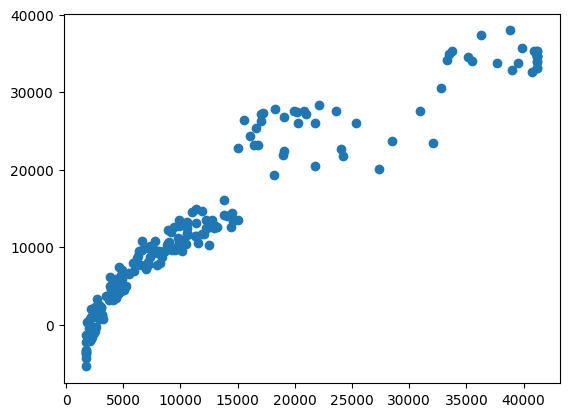

In [58]:
plt.scatter(y_val, predictions)

In [59]:
from sklearn import metrics

In [60]:
predictions.shape

(201,)

## Prediction on validation data

In [61]:
print('MAE:', metrics.mean_absolute_error(y_val, predictions))
print('MSE:', metrics.mean_squared_error(y_val, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_val, predictions)))

MAE: 2722.5216102710538
MSE: 13833225.665143648
RMSE: 3719.304459861232


In [64]:
tpred = lm.predict(X_test)

# Final Predictions

In [65]:
print('MAE:', metrics.mean_absolute_error(y_test, tpred))
print('MSE:', metrics.mean_squared_error(y_test, tpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, tpred)))

MAE: 2440.2172510078503
MSE: 10878516.591315715
RMSE: 3298.25963067126


# Bagging Linear Regression

In [66]:
from sklearn.ensemble import BaggingRegressor

In [67]:
lr_model = LinearRegression()

In [68]:
bagging_reg = BaggingRegressor(estimator=lr_model, n_estimators=150, random_state=42,warm_start=True)

In [69]:
bagging_reg.fit(X_train, y_train)

BaggingRegressor(estimator=LinearRegression(), n_estimators=150,
                 random_state=42, warm_start=True)

In [70]:
y_pred = bagging_reg.predict(X_test)

In [71]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2437.991867260845
MSE: 10876835.341522207
RMSE: 3298.0047515918177


# K-fold Cross Validation

In [72]:
from sklearn.metrics import make_scorer, mean_squared_error

In [73]:
from sklearn.model_selection import cross_val_score,KFold

In [74]:
def rmse_score(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [75]:
  rmse_scorer = make_scorer(rmse_score, greater_is_better=False)

In [76]:
kf = KFold(n_splits=15, shuffle=True, random_state=42)

In [79]:
cv_scores = cross_val_score(lm, X, y, cv=kf, scoring=rmse_scorer)

In [80]:
print(f"Cross-validated RMSE scores: {cv_scores}")
print(f"Mean RMSE: {-np.mean(cv_scores)}")

Cross-validated RMSE scores: [-3228.35690576 -3554.66759254 -3235.19892009 -3588.65379726
 -3377.65492656 -3495.11581126 -3836.78080607 -4029.15732965
 -3243.34419949 -3327.78726214 -4038.62172777 -2963.41696677
 -3404.73353263 -3699.01458821 -3541.45360112]
Mean RMSE: 3504.2638644888484
